In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
from matplotlib import pyplot as plt
import seaborn as sns

# Data Load

In [5]:
df = pd.read_csv('Brazilian_ecommerce (merged).csv', index_col = 0)

# Data Preparation

In [6]:
df['sales'] = df['price'] * df['items_count']

for col in df.columns:
    if col.endswith('_timestamp') or col.endswith('_date') or col.endswith('_at'):
        try:
            # df[col] = pd.to_datetime(df[col]).dt.date
            df[col] = pd.to_datetime(df[col])
            # if col.endswith('_timestamp'):
                # df[col] = pd.to_datetime(df[col])
            # elif col.endswith('_date') or col.endswith('_at'):
                # df[col] = pd.to_datetime(df[col]).dt.date
                # df[col] = pd.to_datetime(df[col]).dt.to_period('M')
        except Exception as e:
            print(f'Error mengonversi kolom {col}: {e}')
            pass

display(df.head())
display(df.info())

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,6426d21aca402a131fc0a5d0960a3c90,2017-05-23,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05-23,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90


<class 'pandas.core.frame.DataFrame'>
Index: 93100 entries, 1 to 96459
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93100 non-null  object        
 1   items_count                    93100 non-null  int64         
 2   customer_id                    93100 non-null  object        
 3   order_status                   93100 non-null  object        
 4   order_purchase_timestamp       93100 non-null  datetime64[ns]
 5   order_approved_at              93100 non-null  datetime64[ns]
 6   order_delivered_carrier_date   93100 non-null  datetime64[ns]
 7   order_delivered_customer_date  93100 non-null  datetime64[ns]
 8   order_estimated_delivery_date  93100 non-null  datetime64[ns]
 9   seller_id                      93100 non-null  object        
 10  shipping_limit_date            93100 non-null  datetime64[ns]
 11  price               

None

In [171]:
df.head()

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04,2017-05,2017-05,2017-05,dd7ddc04e1b6c2c614352b383efe2d36,2017-05,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01,2018-01,2018-01,2018-02,5b51032eddd242adc84c38acab88f23d,2018-01,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08,2018-08,2018-08,2018-08,9d7a1d34a5052409006425275ba1c2b4,2018-08,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02,2017-02,2017-03,2017-03,df560393f3a51e74553ab94004ba5c87,2017-02,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05,2017-05,2017-05,2017-06,6426d21aca402a131fc0a5d0960a3c90,2017-05,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90


# EDA

In [172]:
# Data Describe

df.select_dtypes(include = [int, float]).describe().round(2)

,items_count,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,customer_lat,customer_lng,seller_zip_code_prefix,seller_lat,seller_lng,sales
count,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.0,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00
mean,1.20,124.35,20.06,48.20,781.86,2.21,2030.48,29.63,16.13,22.64,1.02,2.9,155.65,4.15,35114.73,-21.20,-46.19,24584.84,-22.80,-47.23,142.97
std,0.75,187.86,15.65,11.48,655.76,1.75,3646.20,16.39,13.20,11.78,0.24,2.7,214.49,1.29,29830.97,5.60,4.06,27722.50,2.76,2.35,241.43
min,1.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,0.00,1.00,1003.00,-33.69,-72.67,1001.00,-32.07,-63.89,0.85
25%,1.00,40.50,13.21,42.00,341.00,1.00,269.00,18.00,8.00,15.00,1.00,1.0,59.00,4.00,11320.00,-23.59,-48.11,6429.00,-23.61,-48.81,46.99
50%,1.00,78.95,16.32,52.00,598.00,1.00,650.00,24.00,13.00,20.00,1.00,2.0,102.00,5.00,24360.00,-22.93,-46.63,13503.00,-23.43,-46.74,89.00
75%,1.00,139.00,21.15,57.00,990.25,3.00,1800.00,37.00,20.00,30.00,1.00,4.0,173.00,5.00,58701.50,-20.14,-43.64,29156.00,-21.76,-46.52,151.90
max,63.00,6735.00,409.68,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,19.00,24.0,13664.00,5.00,99980.00,42.18,-7.74,99730.00,-2.50,-34.86,14998.50


#### Freight Analysis

Aims to know the percentage postage discount on shipping payment that can still be profitable for the company

In [29]:
profit_admin = 0.3

df_freight = df.copy()
df_freight['sales_freight_payed_100'] = df_freight['sales'] * profit_admin - df_freight['freight_value']
df_freight['sales_freight_payed_50'] = df_freight['sales'] * profit_admin - df_freight['freight_value'] * 0.5
df_freight.order_approved_at = df_freight.order_approved_at.dt.to_period('M')
df_freight.head()

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales,sales_freight_payed_100,sales_freight_payed_50
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90,52.040,62.005
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00,41.830,50.765
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08,2018-08-10,2018-08-14,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99,-8.893,-2.498
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02,2017-02-16,2017-03-01,2017-03-17,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90,41.830,50.900
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05,2017-05-17,2017-05-22,2017-06-06,6426d21aca402a131fc0a5d0960a3c90,2017-05-23,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05-23,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90,-6.120,0.225


Average All Time Profit If Including Free Shipment (100%): 15.97 %
Average All Time Profit If Including Free Shipment (50%): 22.99 %


,order_count,sales,shipping_value,sales_shipping_payed_100,sales_shipping_payed_50,%profit_100,%profit_50
order_approved_at,,,,,,,
2016-10,267,41468.14,5255.31,7185.132,9812.787,17.33,23.66
2016-12,1,10.90,8.72,-5.450,-1.090,-50.00,-10.00
2017-01,698,112094.26,12749.45,20878.828,27253.553,18.63,24.31
2017-02,1604,240370.98,31681.34,40429.954,56270.624,16.82,23.41
2017-03,2464,358527.85,45842.30,61716.055,84637.205,17.21,23.61
2017-04,2188,342177.59,42341.32,60311.957,81482.617,17.63,23.81
2017-05,3390,511084.42,65475.74,87849.586,120587.456,17.19,23.59
2017-06,2993,425927.59,57685.18,70093.097,98935.687,16.46,23.23
2017-07,3673,491765.04,69930.96,77598.552,112564.032,15.78,22.89


TypeError: float() argument must be a string or a real number, not 'Period'

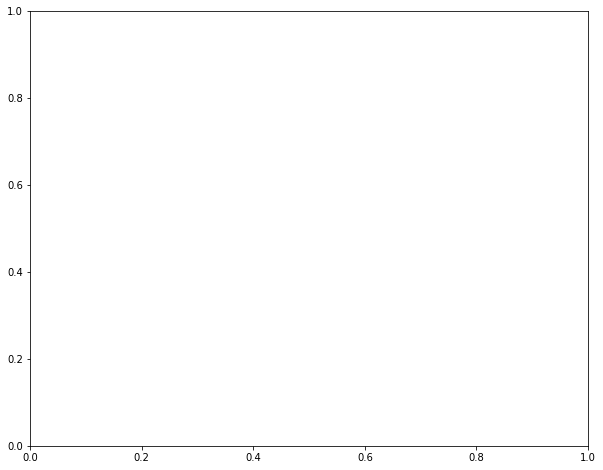

In [32]:
df_freight_monthly = df_freight.groupby(['order_approved_at']).agg({'sales' : ['count', 'sum'],
                                                                    'freight_value' : 'sum',
                                                                   'sales_freight_payed_100' : 'sum',
                                                                   'sales_freight_payed_50' : 'sum'})
df_freight_monthly.columns = ['order_count', 'sales', 'shipping_value', 'sales_shipping_payed_100', 'sales_shipping_payed_50']

# Make a Column to Represents Sales after Freight/Shipping Payed
df_freight_monthly['%profit_100'] = round(df_freight_monthly.sales_shipping_payed_100/df_freight_monthly.sales * 100, 2)
df_freight_monthly['%profit_50'] = round(df_freight_monthly.sales_shipping_payed_50/df_freight_monthly.sales * 100, 2)

avg_profit_free_shipment_100 = round(df_freight_monthly.sales_shipping_payed_100.sum()/df_freight_monthly.sales.sum() * 100, 2)
avg_profit_free_shipment_50 = round(df_freight_monthly.sales_shipping_payed_50.sum()/df_freight_monthly.sales.sum() * 100, 2)
print(f'Average All Time Profit If Including Free Shipment (100%): {avg_profit_free_shipment_100} %')
print(f'Average All Time Profit If Including Free Shipment (50%): {avg_profit_free_shipment_50} %')
display(df_freight_monthly)

plt.figure(figsize = (10, 8))
# df_freight_monthly.index.astype(str)
plt.plot(df_freight_monthly['%profit_100'], marker = 'o')
plt.plot(df_freight_monthly['%profit_50'], marker = 'o')
plt.title('Monthly Seller Sales (Shipping Reimbursed) by 100%')
plt.xlabel('Month')
plt.ylabel('Profit (%)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend()
plt.show()

#### Sales and Review Correlation

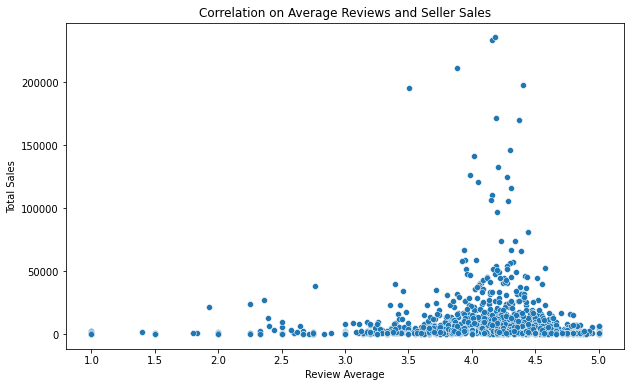

In [36]:
seller_reviews = df.groupby('seller_id')['review_score'].mean().reset_index()
seller_sales = df.groupby('seller_id')['sales'].sum().reset_index()

sales_reviews_sum = pd.merge(seller_reviews, seller_sales, on='seller_id')

# Plot korelasi
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'review_score',
                y = 'sales', 
                data = sales_reviews_sum)
plt.title('Correlation on Average Reviews and Seller Sales')
plt.xlabel('Review Average')
plt.ylabel('Total Sales')
plt.show()

#### Sales and Reviews Heatmap

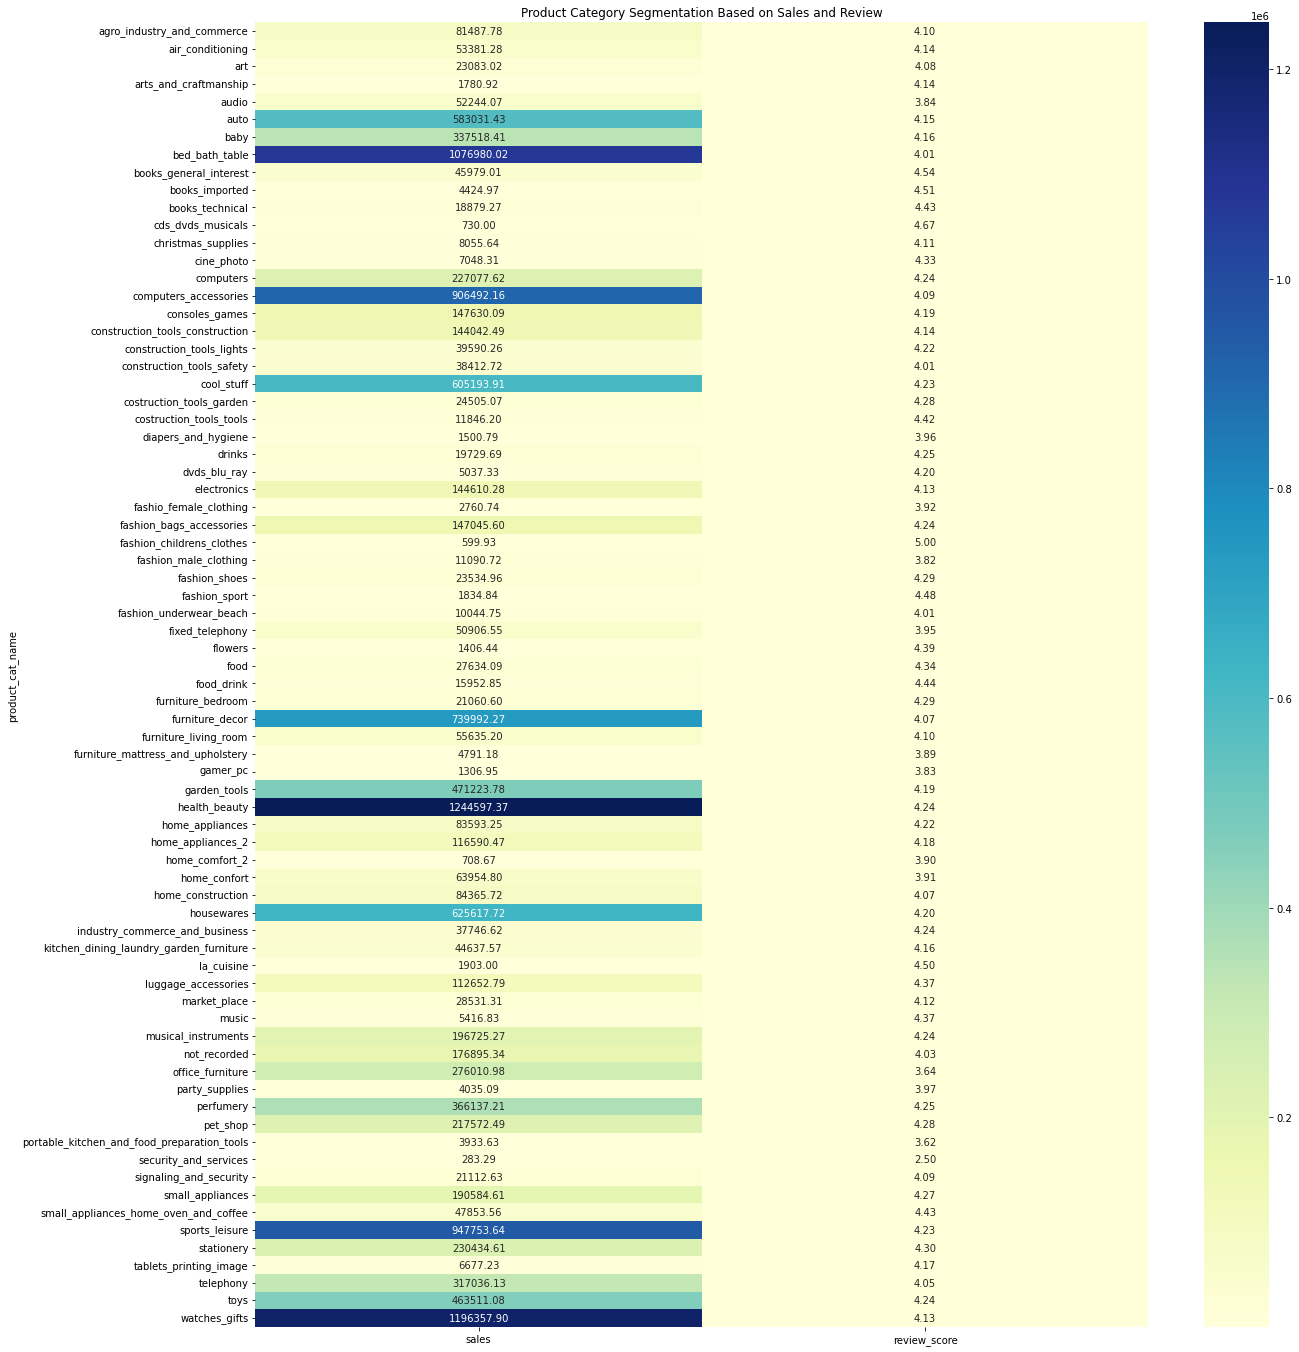

In [19]:
category_sales = df.groupby('product_cat_name')['sales'].sum().reset_index()
category_reviews = df.groupby('product_cat_name')['review_score'].mean().reset_index()

category_data = pd.merge(category_sales, category_reviews, on='product_cat_name')

# Heatmap untuk segmentasi kategori
category_data.set_index('product_cat_name', inplace = True)
plt.figure(figsize = (20, 24))
sns.heatmap(category_data, annot = True, cmap = 'YlGnBu', fmt = '.2f')
# plt.title('Segmentasi Kategori Produk berdasarkan Penjualan dan Review')
plt.title('Product Category Segmentation Based on Sales and Review')
plt.show()

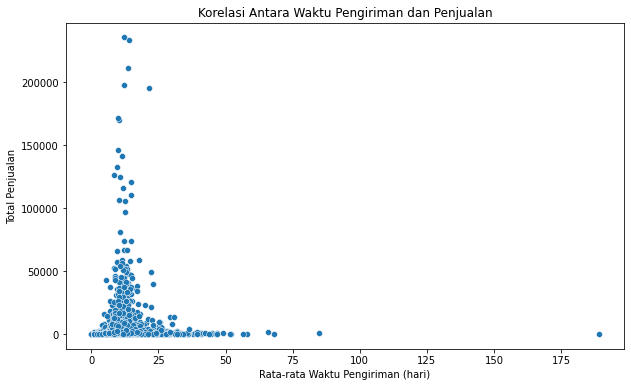

In [37]:
df_dlv_time = df.copy()

df_dlv_time['delivery_time'] = (df_dlv_time['order_delivered_customer_date'] - df_dlv_time['order_purchase_timestamp']).dt.days

seller_delivery_time = df_dlv_time.groupby('seller_id')['delivery_time'].mean().reset_index()
seller_sales = df_dlv_time.groupby('seller_id')['sales'].sum().reset_index()

delivery_sales = pd.merge(seller_delivery_time, seller_sales, on='seller_id')

# Plot delivery time vs sales
plt.figure(figsize = (10,6))
sns.scatterplot(x='delivery_time', y='sales', data = delivery_sales)
plt.title('Korelasi Antara Waktu Pengiriman dan Penjualan')
plt.xlabel('Rata-rata Waktu Pengiriman (hari)')
plt.ylabel('Total Penjualan')
plt.show()

In [217]:
df['order_delivered_customer_date']
# df['order_purchase_timestamp']

1       2017-04-26 10:53:06
2       2018-01-14 14:33:31
3       2018-08-08 10:00:35
4       2017-02-04 13:57:51
5       2017-05-15 21:42:34
                ...        
96455   2018-04-23 13:57:06
96456   2018-07-14 10:26:46
96457   2017-10-23 17:07:56
96458   2017-08-14 23:02:59
96459   2018-06-09 17:00:18
Name: order_purchase_timestamp, Length: 93100, dtype: datetime64[ns]

#### Seller Growth Analysis

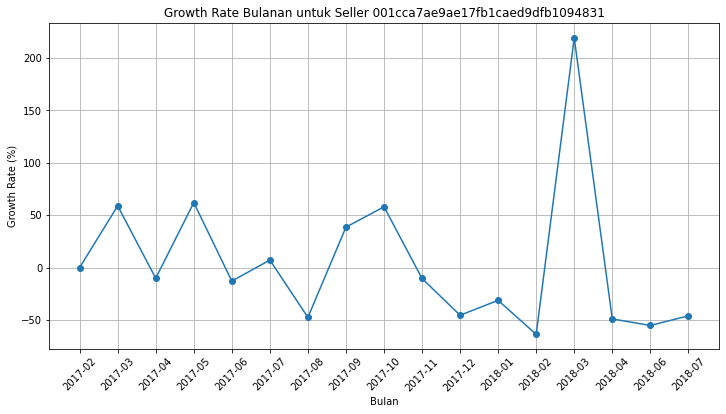

In [54]:
df['month_order'] = df['order_purchase_timestamp'].dt.to_period('M')

seller_monthly_sales = df.groupby(['seller_id', 'month_order'])['sales'].sum().reset_index()

seller_monthly_sales = seller_monthly_sales.sort_values(by = ['seller_id', 'month_order'])
seller_monthly_sales['monthly_growth'] = seller_monthly_sales.groupby('seller_id')['sales'].pct_change() * 100
seller_monthly_sales.monthly_growth.fillna(0, inplace = True)
# seller_monthly_sales.monthly_growth.fillna(1e-6, inplace = True)

first_last_sales = seller_monthly_sales.groupby('seller_id').agg(
    first_month = ('month_order', 'first'),
    last_month = ('month_order', 'last'),
    first_sales = ('sales', 'first'),
    last_sales = ('sales', 'last')
).reset_index()

first_last_sales['first_sales'] = first_last_sales['first_sales'].replace(0, 1e-6)

first_last_sales['total_growth'] = ((first_last_sales['last_sales'] - first_last_sales['first_sales']) / first_last_sales['first_sales']) * 100

df = df.merge(seller_monthly_sales[['seller_id', 'month_order', 'monthly_growth']], on=['seller_id', 'month_order'], how='left')

# Example
seller_id = '001cca7ae9ae17fb1caed9dfb1094831'  
seller_growth = seller_monthly_sales[seller_monthly_sales['seller_id'] == seller_id]

plt.figure(figsize = (12, 6))
plt.plot(seller_growth['month_order'].astype(str), seller_growth['monthly_growth'], marker = 'o')
plt.title(f'Growth Rate Bulanan untuk Seller {seller_id}')
plt.xlabel('Bulan')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()


In [48]:
seller_avg_growth = seller_monthly_sales.groupby('seller_id').agg({'monthly_growth' : ['mean', 'count']}).reset_index().round(2)

seller_avg_growth.columns = ['seller_id', 'avg_growth_rate', 'months']
seller_avg_growth['avg_growth_rate'].fillna(0, inplace = True)
seller_avg_growth.sort_values(by = 'months', ascending = False, inplace = True)

display(seller_avg_growth)

seller_avg_growth_grp = seller_avg_growth.groupby('months').agg({'avg_growth_rate' : ['mean', 'count']}).round(2)
seller_avg_growth_grp.columns = ['avg_growth_rate', 'seller_count']
display(seller_avg_growth_grp)

,seller_id,avg_growth_rate,months
749,440dd6ab244315c632130ecfb63827b1,43.31,21
228,1554a68530182680ad5c8b042c3ab563,51.70,21
1955,b2ba3715d723d245138f291a6fe42594,52.66,21
1810,a3a38f4affed601eb87a97788c949667,63.19,21
1093,620c87c171fb2a6dd6e8bb4dec959fc6,33.87,21
...,...,...,...
933,535bf14f36346c7f59d87cece104d70c,0.00,1
2358,d598f929fc44e1e38678e7f47250ec04,0.00,1
930,533d46c1b06970e99f09523a61df4972,0.00,1
929,53336f97ddbe53e2a617d07b17447b95,0.00,1


,avg_growth_rate,seller_count
months,,
1,0.00,661
2,48.25,431
3,62.72,302
4,83.54,244
5,74.74,212
6,108.44,140
7,110.42,111
8,72.08,93
9,126.54,74


In [52]:
seller_1_month = seller_avg_growth[seller_avg_growth.months == 1]
seller_3_month = seller_avg_growth[(2 <= seller_avg_growth.months) & (seller_avg_growth.months <= 3)]
seller_6_month = seller_avg_growth[(4 <= seller_avg_growth.months) & (seller_avg_growth.months <= 6)]
seller_9_month = seller_avg_growth[(7 <= seller_avg_growth.months) & (seller_avg_growth.months <= 9)]
seller_12_month = seller_avg_growth[(10 <= seller_avg_growth.months) & (seller_avg_growth.months <= 12)]
seller_12_up_month = seller_avg_growth[seller_avg_growth.months > 12]

print(f'''Seller Count Based on Timelength & Avg Seller Sales:
1 Month Seller    : {len(seller_1_month)}, average : {seller_1_month.avg_growth_rate.mean().round(2)}
3 Month Seller    : {len(seller_3_month)}, average : {seller_3_month.avg_growth_rate.mean().round(2)}
6 Month Seller    : {len(seller_6_month)}, average : {seller_6_month.avg_growth_rate.mean().round(2)}
9 Month Seller    : {len(seller_9_month)}, average : {seller_9_month.avg_growth_rate.mean().round(2)}
12 Month Seller   : {len(seller_12_month)}, average : {seller_12_month.avg_growth_rate.mean().round(2)}
> 12 Month Seller : {len(seller_12_up_month)}, average : {seller_12_up_month.avg_growth_rate.mean().round(2)}''')

Seller Count Based on Timelength & Avg Seller Sales:
1 Month Seller    : 661, average : 0.0
3 Month Seller    : 733, average : 54.21
6 Month Seller    : 596, average : 86.26
9 Month Seller    : 278, average : 101.88
12 Month Seller   : 219, average : 91.29
> 12 Month Seller : 339, average : 87.64


In [121]:
seller_6_month.sort_values(by = ['seller_id', 'months'])

,seller_id,avg_growth_rate,months
9,00fc707aaaad2d31347cf883cd2dfe10,583.02,6
16,014d9a685fd57276679edd00e07089e5,43.60,4
18,01bcc9d254a0143f0ce9791b960b2a47,115.89,5
19,01c97ebb5cdac52891c0ed1c37ba0012,71.29,6
21,01ed254b9ff8407dfb9d99ba1e17d923,-29.60,4
...,...,...,...
2807,fec6275253471ace26d209bbaa64cd0f,16.67,5
2815,ff4e2d38692ce827b1a4f4b8196e680d,15.48,6
2816,ff4ea69c2a729e83e63c7579e4ef8170,69.70,4
2819,ffa6adafb71b807dc13159e26431354c,28.28,5


In [53]:
seller_monthly_sales[seller_monthly_sales.seller_id == 'a3dd39f583bc80bd8c5901c95878921e']

,seller_id,month_order,sales,monthly_growth
9948,a3dd39f583bc80bd8c5901c95878921e,2017-08,53.89,0.000001
9949,a3dd39f583bc80bd8c5901c95878921e,2017-09,52.00,-3.507144
9950,a3dd39f583bc80bd8c5901c95878921e,2017-10,2631.16,4959.923077
9951,a3dd39f583bc80bd8c5901c95878921e,2017-11,2076.90,-21.065234
9952,a3dd39f583bc80bd8c5901c95878921e,2017-12,359.50,-82.690548
9953,a3dd39f583bc80bd8c5901c95878921e,2018-02,149.00,-58.553547
9954,a3dd39f583bc80bd8c5901c95878921e,2018-03,49.90,-66.510067
9955,a3dd39f583bc80bd8c5901c95878921e,2018-04,149.70,200.000000


In [109]:
product_monthly_sales = df.groupby(['product_cat_name', 'month_order'])['sales'].sum().reset_index()

product_monthly_sales = product_monthly_sales.sort_values(by = ['product_cat_name', 'month_order'])
product_monthly_sales['monthly_growth'] = product_monthly_sales.groupby('product_cat_name')['sales'].pct_change() * 100
product_monthly_sales.monthly_growth.fillna(1e-6, inplace = True)

first_last_sales = product_monthly_sales.groupby('product_cat_name').agg(
    first_month = ('month_order', 'first'),
    last_month = ('month_order', 'last'),
    first_sales = ('sales', 'first'),
    last_sales = ('sales', 'last')
).reset_index()

first_last_sales['first_sales'] = first_last_sales['first_sales'].replace(0, 1e-6)

first_last_sales['total_growth'] = ((first_last_sales['last_sales'] - first_last_sales['first_sales']) / first_last_sales['first_sales']) * 100

df = df.merge(product_monthly_sales[['product_cat_name', 'month_order', 'monthly_growth']], 
              on = ['product_cat_name', 'month_order'], 
              how = 'left')

product_cat_name = '001cca7ae9ae17fb1caed9dfb1094831'  
seller_growth = product_monthly_sales[product_monthly_sales['product_cat_name'] == product_cat_name]

plt.figure(figsize = (12, 6))
plt.plot(seller_growth['month_order'].astype(str), seller_growth['monthly_growth'], marker = 'o')
plt.title(f'Growth Rate Bulanan untuk Seller {product_cat_name}')
plt.xlabel('Bulan')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

MergeError: Passing 'suffixes' which cause duplicate columns {'monthly_growth_x'} is not allowed.